С использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.


## 1. Считываем данные

In [0]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
import re
import codecs
%matplotlib inline

In [3]:
#Загрузка файла. Если загрузка не требуеться: пропустить. 
from google.colab import files

uploaded = files.upload()
filename=''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  filename=fn

Saving Klub.txt to Klub.txt
User uploaded file "Klub.txt" with length 1055700 bytes


In [0]:
# считываем содержимое файла в объект DataFrame

file_obj = codecs.open(filename,"r",encoding='utf-8')
data_list = file_obj.readlines()
#считываем текстовый файл и его строки


In [0]:
lines = 0
s=''

### 2. Далее мы должны разбить текст на предложения. 

In [0]:
for line in data_list: 
    s+=line.strip()
#Переводим лист в STR. 


In [0]:
#data_list если захотим посмотреть текст

In [0]:
s=s.replace('\xa0','').replace('..','').replace('-','').replace('—',''); #удаляем ненужные символы (можно сделать словарь таких символов)

In [0]:
new_text = re.sub(r'[.!?]', r'|', s) #\s - вариант без s работает лучше
final_text=new_text.split('|')

In [11]:
print("Приблизительное число предложений: %d" % len(final_text))

Приблизительное число предложений: 8543


In [0]:
#Пример предложения:
final_text[245]

'Как ты считаешь, был ли на самом деле настоящий Мерлин'

Подсчет длин предложений

In [0]:
final_len=[] 
for i in range(len(final_text)):
        final_len.append(len(final_text[i]))
final_len[10:20]

[23, 50, 68, 127, 117, 72, 60, 139, 198, 85]

## 3. Простой подсчет слов без поиска похожих

In [0]:
key=[]

In [0]:
for i in final_text:
    for j in re.split(r'\s+', i):
        key.append(j)

In [0]:
#очистим выборку вообще от всего лишниго кроме русссксих букв
import re
for i in range(len(key)):
  key[i]= key[i].lower() #переводим в нижний регистр
  reg = re.compile('[^а-яА-Я ]') #регулярное выражение 
  key[i]=reg.sub('', key[i])

In [0]:
lenss=pd.Series(key)

In [0]:
temps_df = pd.DataFrame(
            {'Слово': lenss 
            })

In [0]:
from collections import Counter
letter_counts = Counter(key)
df = pd.DataFrame.from_dict(letter_counts, orient='index',columns=['Частота'])
#pd.DataFrame.from_dict?
Counter?

Мы посчитали все слова и построили их график, далее мы вывели те слова которые чаще всего встречаються в тексте

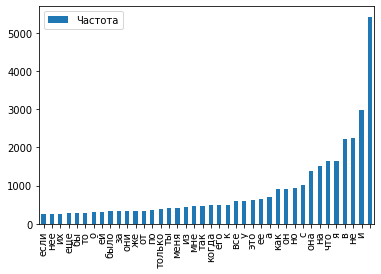

In [0]:
df.sort_values(df.columns.tolist()).tail(40).plot(kind='bar');

In [0]:
#Функция которая ищет в словаре сколько раз встречаеться определенное слово
def get_key(d, value):
    for k, v in d.items():
        if k == value:
            return v
print(get_key(letter_counts, 'и'))

2984


## 4. Далее мы должны найти похожие слова

Мы преобразуем в разряженную матрицу

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [0]:
newkey=list(set(key))

In [0]:
cv = CountVectorizer()
cv.fit(newkey)

len(cv.vocabulary_)

19049

In [0]:
print(cv.get_feature_names()[200:300])#пример выборки
worlds=cv.get_feature_names()

['бакалейной', 'баке', 'баки', 'баков', 'баксов', 'балансировал', 'балансирует', 'балдеют', 'баллад', 'баллады', 'бальдр', 'банд', 'бандами', 'бандиты', 'банду', 'банды', 'банка', 'банкам', 'банке', 'банки', 'банковской', 'банковскую', 'банку', 'банфе', 'баптистку', 'барабан', 'барабана', 'барабанам', 'барабанах', 'барабане', 'барабанщица', 'барахла', 'барахло', 'барахлом', 'барби', 'бардом', 'барельеф', 'барин', 'баркер', 'барндейл', 'барндейла', 'барндейлом', 'барндейлу', 'баров', 'барочных', 'барри', 'баррио', 'барсука', 'барт', 'барта', 'бархат', 'бархата', 'бархату', 'батарейкой', 'батарейку', 'батарею', 'баттербери', 'баттерберикакто', 'баффи', 'бах', 'баха', 'башен', 'башке', 'башку', 'башмаки', 'башне', 'башней', 'башни', 'башня', 'башнях', 'ббилли', 'бегает', 'бегать', 'бегают', 'беглеца', 'беглецам', 'беглецов', 'беглецы', 'беглого', 'беглый', 'беглых', 'беглянка', 'бегом', 'бегство', 'бегущие', 'бегущий', 'беда', 'бедная', 'бедное', 'бедности', 'бедность', 'бедную', 'бедные'

In [0]:
#очистим выборку вообще от всего лишниго кроме русссксих букв
import re
for i in range(len(worlds)):
  reg = re.compile('[^а-яА-Я ]')
  worlds[i]=reg.sub('', worlds[i])

In [0]:
worlds=list(filter(None, worlds))

In [0]:
sordpdseries=pd.Series(worlds)


In [0]:
w=[[]]
worlds[100][2]
w[0].append(worlds[100])
w

[['англосаксонские']]

In [0]:
#Пример работы CountVectorizer
testText=['паравоз','мама','паравозы','дети','матери']
cvTest = CountVectorizer()
cvTest.fit(testText)
print(cvTest.get_feature_names()[0:5])


['дети', 'мама', 'матери', 'паравоз', 'паравозы']


В прицепе мы уже можем просто взять слова которые расположены рядом (например +/-2 и сказать что эти слова будут похожие(с какой то долей вероятности так оно и будет), но лучше анализировать пары слов. 

In [0]:
x=cv.fit_transform(newkey)

In [0]:
print(x.toarray().shape)
len(x.toarray())
x


(19068, 19049)


<19068x19049 sparse matrix of type '<class 'numpy.int64'>'
	with 19049 stored elements in Compressed Sparse Row format>

Далее мы берем косинусоидальное растояние между ними и считаем его. Выбираем какой то критери отбора (0,001)

In [0]:
from scipy.spatial import distance
c=distance.cosine(x.toarray()[10012],x.toarray()[10013])
print(c)    
#Однако расстояние между любыми 2 веторами все равно будет 1 в разряженной матрице. 

1.0


In [0]:
vectorizer = TfidfVectorizer()
XS = vectorizer.fit_transform(final_text)

In [0]:
XS.shape


(8543, 19019)

По этому мы меняем способ анализа и считаем число совподающих букв в 2х словах которые расположены рядом. Если они отличаються менее чем на 2 буквы считаем слова одинаковыми (и их длина больше 5)

In [0]:
def getworlds(worlds):
    returnworlds=[]
    kounters=0
    worldscounter=0
    sums=[]
    counter=0
    for i in range(len(worlds)-1):
        s=min(len(worlds[i]),len(worlds[i+1]))
        if s<5:  #мы пропускаем все слова длина которых меньше 5. Это кастыль, но иначе группировка будет не совсем корректной.
            returnworlds.append([worlds[i]])




            continue

        for j in range(s):  #мы считаем буквы (считаем число одинаковых букв)
            if worlds[i][j]==worlds[i+1][j]:
                worldscounter+=1
        if (max(len(worlds[i]),len(worlds[i+1]))-worldscounter)<3:
            sums.append(worlds[i])
            worldscounter=0
            
        else:
            returnworlds.append(sums)
            kounters+=1
            worldscounter=0
            sums=[]
    return returnworlds

In [0]:
final=getworlds(worlds)

In [0]:

#очищаем выборку от пустых полей
final=list(filter(None, final))


In [0]:
print("Приблизительное число похожих слов: %d" % len(final))

Приблизительное число похожих слов: 5642


Пример выборки

In [0]:
final=list(filter(None, final))

final[0:10][0:10]

[['аа'],
 ['абзац'],
 ['абстрактном'],
 ['автобус'],
 ['автобусного', 'автобусной'],
 ['автомобиле', 'автомобилей', 'автомобиль'],
 ['автор', 'автора'],
 ['авторов', 'автору'],
 ['автостоянками'],
 ['ага']]

In [0]:
#кривовато конечно но... функция которая ищет сколько 
def counters(final):
  lengthfinal=[]
  for i in range(len(final)):
    counter=0
    
    for j in range(len(final[i])):
      #print(final[i][j] + '  i=  '+str(i)+' j=  '+str(j))
      if get_key(letter_counts,str(final[i][j]))!=None:
        counter+=get_key(letter_counts,str(final[i][j]))
      else:
        counter+=1
    lengthfinal.append([counter])
    #print(counter)
    counter=0
  return lengthfinal  
length=counters(final)
print(length)

[[1], [0], [2], [0], [1], [0], [0], [0], [5], [2], [0], [0], [0], [5], [0], [9], [2], [1], [3], [0], [0], [0], [3], [0], [0], [0], [0], [2], [0], [5], [1], [0], [0], [1], [1], [1], [5], [0], [0], [0], [1], [1], [0], [0], [1], [1], [4], [2], [0], [0], [0], [24], [6], [0], [2], [0], [0], [0], [0], [1], [1], [10], [0], [0], [1], [0], [51], [0], [14], [42], [3], [13], [0], [1], [3], [9], [1], [0], [5], [0], [9], [0], [1], [0], [2], [0], [0], [0], [0], [0], [0], [0], [0], [0], [32], [0], [0], [1], [0], [0], [1], [4], [1], [3], [3], [1], [4], [1], [4], [1], [1], [0], [1], [1], [1], [2], [2], [1], [3], [1], [4], [0], [0], [58], [0], [2], [2], [1], [2], [2], [1], [1], [5], [0], [0], [0], [0], [1], [2], [1], [0], [0], [10], [4], [8], [0], [4], [0], [4], [0], [0], [0], [0], [0], [7], [0], [0], [1], [1], [1], [5], [1], [0], [0], [0], [2], [1], [1], [5], [0], [9], [0], [4], [4], [0], [1], [0], [0], [0], [1], [2], [3], [1], [3], [0], [0], [2], [3], [3], [2], [1], [50], [12], [0], [0], [0], [0], [0]

In [0]:
final=getworlds(worlds)
temps_df = pd.DataFrame(
            {'Слово': final,
            'Частоты':length})
len(final)
len(length)

12079

In [0]:
len(final)


12079

In [0]:
len(length)

12079

In [0]:
temps_df=temps_df.sort_values('Частоты',ascending=False)
temps_df[0:20]
#Данная выборка не учитывает короткие слова, так как короткие слова не позволяет обработать метод (слишком большая ошибка).  Чем длинее слово тем точнее работает метод

,Слово,Частоты
5158,[не],[2251]
11722,[что],[1644]
4770,[на],[1514]
5924,[она],[1393]
5417,[но],[943]
5923,[он],[912]
3481,[как],[898]
2406,[ее],[652]
12000,[это],[612]
1147,[все],[590]


## 5. TF-IDF

In [0]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('count', CountVectorizer(vocabulary=worlds)),
               ('tfid', TfidfTransformer())]).fit(final_text)
finalarray=pipe['count'].transform(final_text).toarray()

In [0]:
finalarray.shape

(8543, 19049)

In [0]:
finalarrayidf=pipe['tfid'].idf_

In [0]:
finalarrayidf[20:50]

array([8.95437227, 9.35983738, 9.35983738, 7.85575998, 9.35983738,
       9.35983738, 9.35983738, 9.35983738, 9.35983738, 9.35983738,
       8.6666902 , 9.35983738, 8.6666902 , 9.35983738, 8.6666902 ,
       8.95437227, 9.35983738, 9.35983738, 9.35983738, 9.35983738,
       8.95437227, 9.35983738, 8.95437227, 9.35983738, 9.35983738,
       8.6666902 , 9.35983738, 9.35983738, 9.35983738, 8.95437227])

In [0]:
#Получаем датафрейм
df = pd.DataFrame(finalarrayidf,  index = worlds)
print(df)


                    0
аа           9.359837
абердинский  9.359837
абзац        8.954372
абзаца       9.359837
абонировала  9.359837
...               ...
ящике        8.443547
ящики        8.954372
ящиков       9.359837
ящиком       8.954372
ящикто       9.359837

[19049 rows x 1 columns]


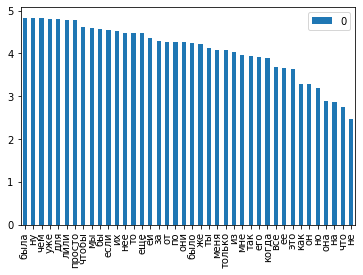

In [0]:
#Строим  график
df.sort_values(df.columns.tolist(),ascending=False).tail(40).plot(kind='bar');
#Если что это своеобразная гистограмма частоты

In [0]:
#Тут фактически получены веса слов, однако мы не можем на основании этих весов группировать слова... наверное. 


##6. Word2Vec 

In [0]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
from pprint import pprint  # в качестве эксперемента используем pprint
from collections import defaultdict

#создаем список стом слов которые мы хотим удалить из предложений
stoplist = set('не он что все ее это когда и.т и.т.д т.д'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist] #проверяем нет ли элемента в стом листе
    for document in final_text #перебираем элекменты
]

# токинизируемся 
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts[2:4]) #пример вывода

[['языка,', 'и', 'этому', 'любовь', 'миллионов', 'читателей', 'по', 'всему'],
 ['большие',
  'города,',
  'будь',
  'то',
  'оттава',
  'или',
  'воображением',
  'ньюфорд,',
  'полны',
  'и']]


In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)
dictionary.save('test1712.dict')

2019-12-19 06:06:37,311 : INFO : 'pattern' package not found; tag filters are not available for English
2019-12-19 06:06:37,319 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-19 06:06:37,432 : INFO : built Dictionary(7225 unique tokens: ['автор', 'де', 'знаменитого', 'известный', 'линт']...) from 8543 documents (total 70102 corpus positions)
2019-12-19 06:06:37,434 : INFO : saving Dictionary object under test1712.dict, separately None
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-19 06:06:37,443 : INFO : saved test1712.dict


Dictionary(7225 unique tokens: ['автор', 'де', 'знаменитого', 'известный', 'линт']...)


In [0]:
print(dictionary.token2id)
#фактически создаем словарь

{'автор': 0, 'де': 1, 'знаменитого': 2, 'известный': 3, 'линт': 4, 'писатель,': 5, 'чарльз': 6, 'в': 7, 'и': 8, 'произведениях': 9, 'своих': 10, 'удается': 11, 'элементы': 12, 'всему': 13, 'любовь': 14, 'миллионов': 15, 'по': 16, 'читателей': 17, 'этому': 18, 'языка,': 19, 'большие': 20, 'будь': 21, 'воображением': 22, 'города,': 23, 'или': 24, 'ньюфорд,': 25, 'оттава': 26, 'полны': 27, 'то': 28, 'за': 29, 'из': 30, 'история,': 31, 'их': 32, 'каждым': 33, 'них': 34, 'ночи': 35, 'окна,': 36, 'порой': 37, 'своя': 38, 'словно': 39, 'апполина': 40, 'взгляд': 41, 'героини': 42, 'кассандра': 43, 'мэйзи,': 44, 'на': 45, 'первый': 46, 'сара,': 47, 'такие': 48, 'этих': 49, 'американских': 50, 'вас': 51, 'во': 52, 'вы': 53, 'где': 54, 'голос': 55, 'границы': 56, 'же': 57, 'жива': 58, 'кому': 59, 'конце': 60, 'линта,': 61, 'мир': 62, 'мраке': 63, 'но,': 64, 'они': 65, 'отыскать': 66, 'пересекать': 67, 'плут': 68, 'путь': 69, 'свет': 70, 'свой': 71, 'скрипки,': 72, 'старик': 73, 'старинных': 74, '

In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  #И так мы получили некую разряженную матрицу которая показывает сколько раз каждое слово сожержиться в документе.
print(corpus)

2019-12-19 06:06:42,326 : INFO : storing corpus in Matrix Market format to /tmp/deerwester.mm
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-19 06:06:42,328 : INFO : saving sparse matrix to /tmp/deerwester.mm
2019-12-19 06:06:42,330 : INFO : PROGRESS: saving document #0
2019-12-19 06:06:42,343 : INFO : PROGRESS: saving document #1000
2019-12-19 06:06:42,357 : INFO : PROGRESS: saving document #2000
2019-12-19 06:06:42,370 : INFO : PROGRESS: saving document #3000
2019-12-19 06:06:42,382 : INFO : PROGRESS: saving document #4000
2019-12-19 06:06:42,394 : INFO : PROGRESS: saving document #5000
2019-12-19 06:06:42,407 : INFO : PROGRESS: saving document #6000
2019-12-19 06:06:42,421 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(1, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(8, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(7, 1), (8, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1)], [(8, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(1, 2), (7, 4), (8, 3), (23, 1), (30, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2)], [(7, 1), (8, 1), (30, 1), (62, 1), (68, 1), (69, 1), (81, 1), (82, 1)], [(7, 1), (8, 1), (83, 1), (84, 1), (85, 1)], [(8, 1), (86, 1), (87, 1)], [(1, 1), (4, 1), (6, 1), (88, 1

In [0]:
corpus[154]# пример выборки... то есть привели наш текст к токенизированной числовой форме где ключь это слово а знгачение сколько раз слово стречаеться 

[(7, 1),
 (8, 1),
 (28, 1),
 (32, 1),
 (144, 2),
 (149, 1),
 (151, 1),
 (175, 1),
 (195, 1),
 (401, 1),
 (458, 1),
 (493, 1),
 (523, 1),
 (672, 1),
 (768, 1),
 (908, 1),
 (909, 1),
 (910, 1),
 (911, 1),
 (912, 1),
 (913, 1),
 (914, 1)]

In [0]:
#проблема лишь в том что при такой токенизации можно попробовать найти похожие предложения но не слова... 

##Гугл?

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
!pip install word2vec
import word2vec

     |████████████████████████████████| 61kB 1.7MB/s 
  Created wheel for word2vec: filename=word2vec-0.10.2-cp36-cp36m-linux_x86_64.whl size=128663 sha256=2093b12427bc31f7aaa1f1e0bc0913a47f37c2cb5c001cc5b37dd7fa2a4ab872
  Stored in directory: /root/.cache/pip/wheels/ef/9f/06/aec42532c9c37e05f936d4d586b15cfdfc9f2ffb62bd7fed1c
Successfully built word2vec


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
word2vec.word2phrase('/Users/drodriguez/Downloads/text8', '/Users/drodriguez/Downloads/text8-phrases', verbose=True)

Starting training using file /Users/drodriguez/Downloads/text8
ERROR: training data file not found!


Exception: ignored

##7. Вариант с расстоянием Левенштейна

In [0]:
!pip install polyleven
from polyleven import levenshtein
#импортируем библиотеку

  Created wheel for polyleven: filename=polyleven-0.3-cp36-cp36m-linux_x86_64.whl size=23713 sha256=01bf6d39a31883df737611288def95b386b4592e049ca1adddcbf1060cab80ec
  Stored in directory: /root/.cache/pip/wheels/0c/b8/06/ad8f04cd47bfe96e8fb2690fa91f0a505aea44caa172e095aa
Successfully built polyleven


In [0]:
tets = levenshtein('через','череп')  #подобные слова сложно растянуть так как отличие в них в 1 букву и расстояние то же в 1. 

In [0]:
tets

1

In [0]:
#Немного модифицируем наш предыдущий код 
#суть - берем элемент 1 сравниваем с самис собой и доавляем в список, потом сравниваем его со следующим если расастояние левенштейна <2, мы его добавляем в список и так пока не будет больше. 
def getlevenshtein(worlds):
    returnworlds=[]
    worldscounter=0
    sums=[]
    counter=0
    for i in range(len(worlds)-1):

         
         while True:
           
           if levenshtein(worlds[i],worlds[i+counter])<2:
             sums.append(worlds[i+counter])
             counter+=1 
           else:
             
             returnworlds.append(sums)
             
             sums=[]
             if (i+counter)<len(worlds):
               i+=counter
             break  
         counter=0

        
    return returnworlds

In [0]:
#напоминание что такое worlds
worlds[500:510]

['блеск',
 'блеска',
 'блеском',
 'блеснув',
 'блестели',
 'блестело',
 'блестками',
 'блестят',
 'блестящая',
 'блестящего']

In [0]:
finallevenshtein=getlevenshtein(worlds)

In [0]:
#очищаем выборку от пустых полей
finallevenshtein=list(filter(None, finallevenshtein))

In [0]:
print("Приблизительное число похожих слов: %d" % len(finallevenshtein))

Приблизительное число похожих слов: 19048


In [0]:
finallevenshtein[120:150]

[['антикварные', 'антикварным', 'антикварных'],
 ['антикварным', 'антикварных'],
 ['антикварных'],
 ['антисептиками'],
 ['антологии', 'антологий', 'антологию', 'антология'],
 ['антологий', 'антологию', 'антология'],
 ['антологию', 'антология'],
 ['антология', 'антологиях'],
 ['антологиях'],
 ['антропологию'],
 ['аполлон'],
 ['аполлоном'],
 ['аппалачей'],
 ['аппарат'],
 ['аппаратов', 'аппаратом'],
 ['аппаратом'],
 ['аппетит'],
 ['апплес'],
 ['апполина'],
 ['апполинажизнь'],
 ['аптеки'],
 ['арену'],
 ['арестовали'],
 ['аристократии'],
 ['армейской'],
 ['арнольд', 'арнольда'],
 ['арнольда'],
 ['арнольдмаргарита'],
 ['арнольдом'],
 ['аромат']]

In [0]:
lengthlevenshtein=counters(finallevenshtein)

In [0]:
temps_df_lengthLevenshtein = pd.DataFrame(
            {'Слово': finallevenshtein,
            'Частоты':lengthlevenshtein})

In [0]:
temps_df_lengthLevenshtein=temps_df_lengthLevenshtein.sort_values('Частоты',ascending=False)
temps_df_lengthLevenshtein[0:30]

,Слово,Частоты
9402,"[он, она]",2305
8228,[не],2251
18536,"[что, чтоб]",1645
7637,[на],1514
9403,[она],1393
8627,[но],943
5545,[как],898
3859,[ее],652
18939,[это],612
1781,[все],590


##8. Ну а теперь просто свободный полет мысли.... 

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer #токинайзер керас

In [0]:
tokenizer = Tokenizer(num_words=1000)  #берем 1000 наиболее часто употребляемых слов

In [0]:
tokenizer.fit_on_texts(final_text)#индекс

In [0]:
sequences = tokenizer.texts_to_sequences(final_text)#преобразование строки в список
#sequences # -- фактически мы будем тут иметь каждую строку в формате [45,85,96,784] - где цирры это номера слов 


In [0]:
one_hot_results = tokenizer.texts_to_matrix(final_text, mode='binary')#прямое бинарное представление

In [0]:
one_hot_results.shape

In [0]:
one_hot_results

In [0]:
word_index = tokenizer.word_index  #в данном примере мы получаем словарь типа ключ-значение - где ключь это название слова а значение частоту употребления (пример см. в п.3 )

In [0]:
temps_df = pd.DataFrame.from_records([word_index])

In [0]:
temps_df

Таким образом было реализовано 2 способа поиска похожих слов (именно реализовано). 1й на основе расстояния левенштейна, 2 на основе поиска похожих слов.  В обоих случаях на вход подаем массив уже отсортированных слов, что бы не реализовывать дополнительный перебор в каждой итерации. Сложно сразу определить какой метод самый результативный так как у обоих методов есть как плюсы так и минусы

##Не вошедшее

In [0]:
import re
def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()
#Это тут не используеться ...

In [0]:
slovo='ручку'  #что мы ищем

In [0]:
def sent_counts(text,slovo):
    new_text = re.sub(r'\b'+slovo+'', r'|', text)
    sent_num = len(new_text.split('|'))-1
    print('В этом тексте {} '.format(sent_num) + ' слова ' +slovo)

In [0]:
sent_counts(s,slovo)

В этом тексте 10  слова ручку


In [0]:
slovo_big=['воздух','чо','зарплата','сегодня']
def sent_counts_big(text,slovo_big):
    for i in slovo_big:
      sent_counts(text,i)

In [0]:
sent_counts_big(s,slovo_big)

В этом тексте 36  слова воздух
В этом тексте 7  слова чо
В этом тексте 0  слова зарплата
В этом тексте 87  слова сегодня


In [0]:
def sent_sentence(text):
    letters=text
    lens=[]
    string=[]
    key=[]
   # new_text = re.sub(r'[^.!?]+', r'|', text)
    new_texts=re.split('(?<=\w[.!?])', letters)
   # sent_num = len(new_text.split('|'))-1
    print('В этом тексте {} '.format(len(new_texts)) + ' предложений ')
    #print(new_texts)
    #for i in new_texts:
    #    print(i)
    for i in new_texts:
        lens.append(len(i))
        string.append(i)
        for j in re.split(r'\s+', i):
            key.append(j)
    lenss=pd.Series(lens)
    stings=pd.Series(string)
   
    return(lenss,stings,key)
    

In [0]:
key=[]
le,ss,key=sent_sentence(s)

В этом тексте 15047  предложений 


In [0]:
le

0         23
1        169
2         26
3        165
4         71
        ... 
15042     46
15043      8
15044     19
15045     42
15046      0
Length: 15047, dtype: int64

In [0]:
temps_df = pd.DataFrame(
            {'Длина предложения': le,'Предложение':ss 
            })


In [0]:
temps_df

,Длина предложения,Предложение
0,23,Аннотация: Три женщины.
1,169,"Три жертвы насильника, объединившиеся в тайный..."
2,26,.. имеющие железное алиби.
3,165,Детектив Роун Гриффин разрывается между логико...
4,71,..Так кто же совершил убийство — и пытается св...
...,...,...
15042,46,"Он не покачнулся, не дрогнул под ее натиском."
15043,8,— Пицца!
15044,19,— закричала Молли.
15045,42,И вся компания начала готовиться к обеду.


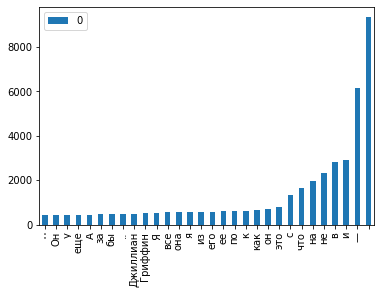

In [0]:
import pandas
from collections import Counter
a = key
letter_counts = Counter(a)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
#df.plot(kind='bar');
df.sort_values(df.columns.tolist()).tail(30).plot(kind='bar');